In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.integrate import simps
import matplotlib
from IPython.display import display, HTML
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = [10., 5.]
matplotlib.rcParams["font.size"] = "16"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

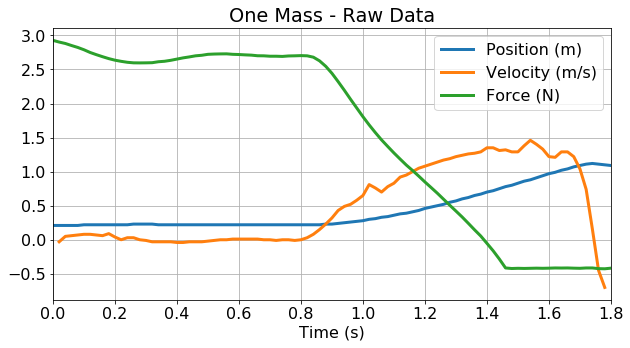

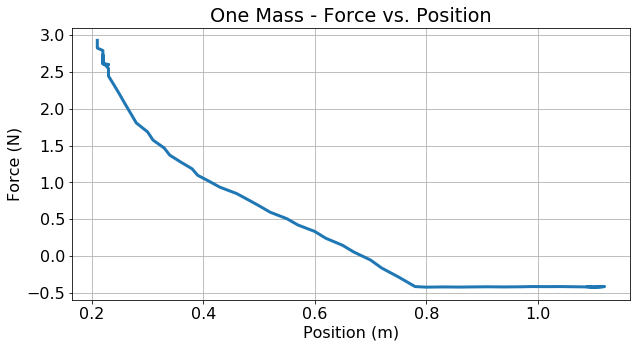

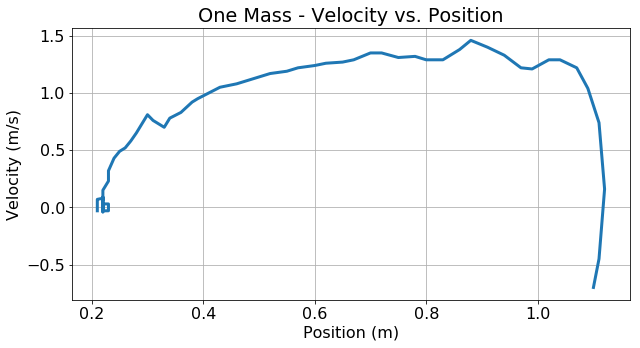

One Mass - Velocity(max): 1.46
One Mass - Kinetic Energy: 0.532900 J


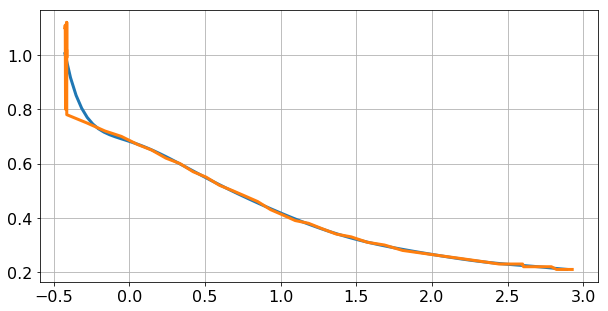

One Mass - Work: 1.413538 J


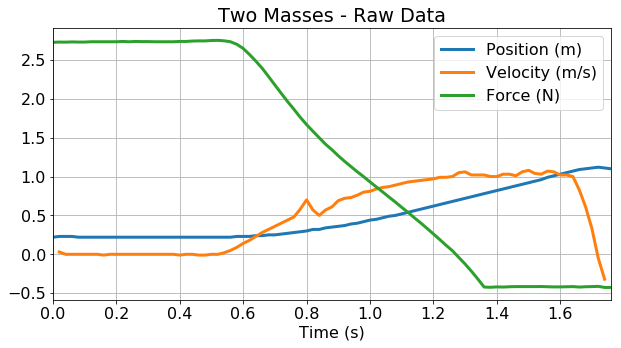

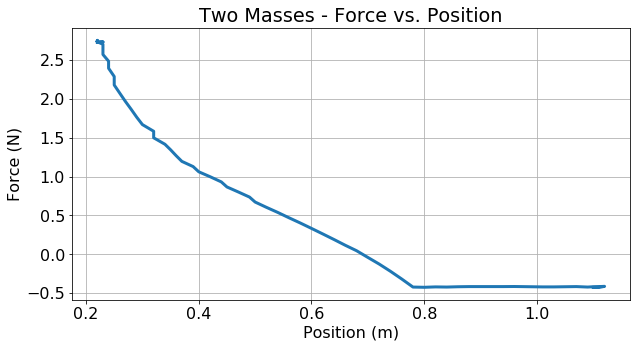

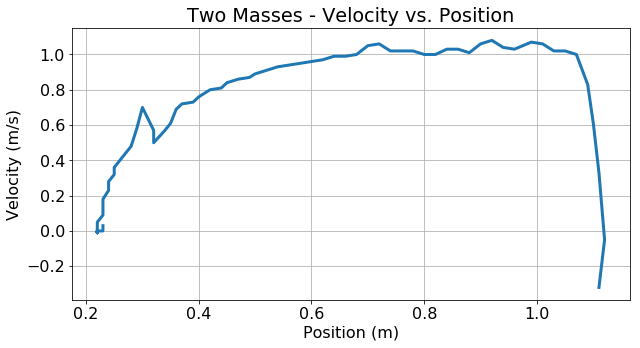

Two Masses - Velocity(max): 1.08
Two Masses - Kinetic Energy: 0.437400 J


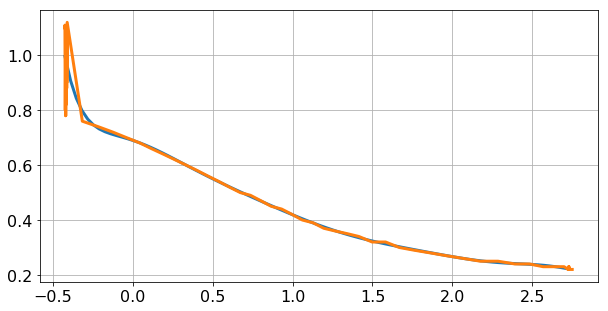

Two Masses - Work: 1.383725 J


In [80]:
def lab(df, title, mass):
        
    df.plot(x='Time (s)')
    plt.title('%s - Raw Data' % title)
    plt.savefig('%s - Raw Data' % title)
    plt.show()

    x_col = 'Position (m)'
    y_col = 'Force (N)'

    x_vals = df[x_col]
    y_vals = df[y_col]
    
    plt.plot(x_vals, y_vals)
    plt.title('%s - Force vs. Position' % title)
    plt.ylabel(y_col)
    plt.xlabel(x_col)
    plt.savefig('%s - Force vs Position' % title)
    plt.show()
    
    y_col = 'Velocity (m/s)'
    x_col = 'Position (m)'
    x_vals = df[x_col]
    y_vals = df[y_col]
    
    plt.plot(x_vals, y_vals)
    plt.title('%s - Velocity vs. Position' % title)
    plt.ylabel(y_col)
    plt.xlabel(x_col)
    plt.savefig('%s - Velocity vs Position' % title)
    plt.show()
    
    max_v = df['Velocity (m/s)'].max()
    print("%s - Velocity(max): %s" % (title,max_v))
    k_e = 0.5 * mass * np.power(max_v, 2)
    print("%s - Kinetic Energy: %f J" % (title, k_e))
    
    df = df.sort_values(by='Force (N)')
    
    # Fit a polynomial so we can integrate with a constant Δx
    f = np.poly1d(np.polyfit(df['Force (N)'], df['Position (m)'], 10))
    
    min_x = df['Force (N)'].min()
    max_x = df['Force (N)'].max()
    samples = len(df['Force (N)'])
    delta_x = abs(max_x - min_x) / samples
    
    # Create a discrete set of samples based on the polynomial with constant Δx
    force_fit_y = np.zeros((samples))
    force_fit_x = np.zeros((samples))
    for i in range(0, samples):
        force_fit_x[i] = df['Force (N)'].min() + i*delta_x
        force_fit_y[i] = f(force_fit_x[i])
        
    plt.plot(force_fit_x, force_fit_y)
    plt.plot(df['Force (N)'], df['Position (m)'])
    plt.show()
        
    # Use simpsons rule to approximate the area under the curve
    print("%s - Work: %f J" % (title, simps(force_fit_y, force_fit_x)))
    
df_one = pd.read_csv('one_mass.csv')
lab(df_one, 'One Mass', 0.5)

df_two = pd.read_csv('two_masses.csv')
lab(df_two, 'Two Masses', 0.75)

In [61]:
1- 0.437400/0.532900

0.1792081065866017